# Import data

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data_bin_label.csv')
data.drop(columns = 'Rating', inplace = True)

# Analysis of ratings

In [3]:
# Mean of the ratings 
mean_rating = data['rating'].mean()
mean_rating

0.16908085330524097

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

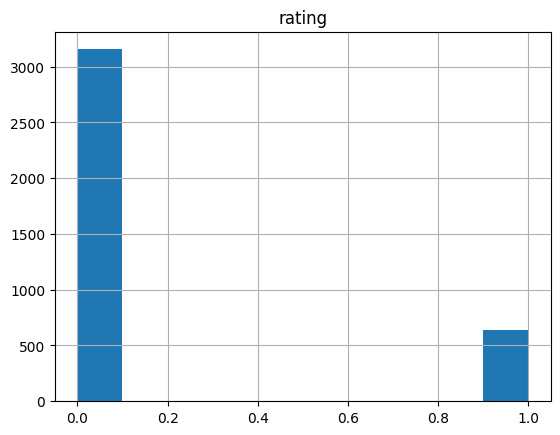

In [4]:
# Distribution of the ratings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data.hist(column='rating')

# Analysis of olfactory notes

In [5]:
# Count the ocurence of each olfactory notes
count = data.sum(axis=0)
df_count_occurrence_notes = pd.DataFrame(count)
df_count_occurrence_notes = df_count_occurrence_notes.drop("rating")
df_count_occurrence_notes.columns = ['occurence']
df_count_occurrence_notes

,occurence
Absinthe_top,0.8
Absolute_base,0.5
Absolute_middle,1.4
Absolute_top,0.2
Accord_base,0.1
...,...
Ylangtincture_top,0.2
Yuzu_middle,0.7
Yuzu_top,6.8
Zefir_top,0.4


In [6]:
df_count_occurrence_notes

,occurence
Absinthe_top,0.8
Absolute_base,0.5
Absolute_middle,1.4
Absolute_top,0.2
Accord_base,0.1
...,...
Ylangtincture_top,0.2
Yuzu_middle,0.7
Yuzu_top,6.8
Zefir_top,0.4


In [7]:
# Check number of olfactory notes
len(df_count_occurrence_notes)

1935

In [8]:
# Occurence of each olfactory notes sorted
df_count_occurrence_notes['occurence'] = pd.to_numeric(df_count_occurrence_notes['occurence'])
df_count_occurrence_notes = df_count_occurrence_notes.sort_values('occurence')
df_count_occurrence_notes

,occurence
Himalayan_base,0.1
Tahitian vanilla_base,0.1
Cappuccino_base,0.1
Candy_base,0.1
Lichen_base,0.1
...,...
Bergamot_top,345.6
Valley_middle,385.7
Lily-of-the-_middle,394.8
Rose_middle,972.3


In [9]:
# Distribution of the number of occurence of olfactory notes
#dis_ol = df_count_occurrence_notes
#plt.hist(dis_ol, bins=150, range = (0,5));
# Conclusion: most of the olfactory notes appear few times (between 0 and 25 times)

In [10]:
df_count_occurrence_notes.value_counts(df_count_occurrence_notes['occurence'] < 1.8)

occurence
True     1244
False     691
dtype: int64

In [11]:
# Drop some olfactory notes
df_count_1 = df_count_occurrence_notes[df_count_occurrence_notes['occurence'] < 1.8]
index_list = df_count_1.index.values.tolist()
data_t = data.drop(index_list, axis=1)
data_test = data_t.drop(columns = 'rating')
print(data_test)
data_test.loc[~(data_test==0.0).all(axis=1)]

      African orange flower_middle  African_middle  African_top  \
0                              0.0             0.0          0.0   
1                              0.0             0.0          0.0   
2                              0.0             0.0          0.0   
3                              0.0             0.0          0.0   
4                              0.0             0.0          0.0   
...                            ...             ...          ...   
3792                           0.0             0.0          0.0   
3793                           0.0             0.0          0.0   
3794                           0.0             0.0          0.0   
3795                           0.0             0.0          0.0   
3796                           0.0             0.0          0.0   

      Agarwood oud_middle  Agarwood_base  Agarwood_middle  Aldehydes_middle  \
0                     0.0            0.0              0.0               0.0   
1                     0.0            

,African orange flower_middle,African_middle,African_top,Agarwood oud_middle,Agarwood_base,Agarwood_middle,Aldehydes_middle,Aldehydes_top,Allspice_middle,Almond_base,...,Wormwood_top,Yellow_middle,Ylang-_middle,Ylang-_top,Ylang-ylang_middle,Ylang-ylang_top,Ylang_middle,Ylang_top,Ylangiris_middle,Yuzu_top
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model (cross-validation)  (Step 1)

## Decision Tree (baseline)

In [12]:
#y_cv.value_counts(normalize=True)

In [13]:
#y_test_rf.value_counts(normalize=True)
#, y_test_rf

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Preparation X and y

data_cv = data.copy()

y_cv = data_cv['rating']

X_cv = data_cv.drop(columns=['rating'])

In [15]:
data_cv['rating']

0       1
1       0
2       0
3       0
4       0
       ..
3792    0
3793    0
3794    1
3795    0
3796    0
Name: rating, Length: 3797, dtype: int64

In [16]:
# Decision Tree Classifier

tree_cv = DecisionTreeClassifier()

cv_results_tree = cross_validate(tree_cv, X_cv, y_cv, scoring = "accuracy", cv=5)

# Mean of scores
cv_results_tree['test_score'].mean()

0.7605994729907773

## Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_cv = RandomForestClassifier()

cv_results_forest = cross_validate(rf_cv, X_cv, y_cv, scoring = "accuracy", cv=5)

# Mean of scores
cv_results_forest['test_score'].mean()

0.8335538450870258

## CatBoostClassifier

In [18]:
from catboost import CatBoostClassifier

cat_cv = CatBoostClassifier()

cv_results_cat = cross_validate(cat_cv, X_cv, y_cv, scoring = "accuracy", cv=5)

# Mean of scores
cv_results_cat['test_score'].mean()

Learning rate set to 0.016555
0:	learn: 0.6839008	total: 65.4ms	remaining: 1m 5s
1:	learn: 0.6754897	total: 69.5ms	remaining: 34.7s
2:	learn: 0.6673685	total: 73.4ms	remaining: 24.4s
3:	learn: 0.6593451	total: 77.2ms	remaining: 19.2s
4:	learn: 0.6518922	total: 80.6ms	remaining: 16s
5:	learn: 0.6445116	total: 84.2ms	remaining: 13.9s
6:	learn: 0.6373986	total: 87.3ms	remaining: 12.4s
7:	learn: 0.6302303	total: 90.6ms	remaining: 11.2s
8:	learn: 0.6236982	total: 93.7ms	remaining: 10.3s
9:	learn: 0.6174665	total: 96.7ms	remaining: 9.57s
10:	learn: 0.6109798	total: 99.8ms	remaining: 8.97s
11:	learn: 0.6051259	total: 103ms	remaining: 8.47s
12:	learn: 0.5995811	total: 106ms	remaining: 8.05s
13:	learn: 0.5942625	total: 109ms	remaining: 7.68s
14:	learn: 0.5890670	total: 112ms	remaining: 7.35s
15:	learn: 0.5838756	total: 115ms	remaining: 7.09s
16:	learn: 0.5789070	total: 119ms	remaining: 6.86s
17:	learn: 0.5743353	total: 122ms	remaining: 6.64s
18:	learn: 0.5695280	total: 125ms	remaining: 6.45s
19

213:	learn: 0.4058979	total: 792ms	remaining: 2.91s
214:	learn: 0.4056833	total: 795ms	remaining: 2.9s
215:	learn: 0.4053875	total: 799ms	remaining: 2.9s
216:	learn: 0.4051725	total: 802ms	remaining: 2.9s
217:	learn: 0.4050543	total: 806ms	remaining: 2.89s
218:	learn: 0.4049799	total: 809ms	remaining: 2.89s
219:	learn: 0.4047543	total: 813ms	remaining: 2.88s
220:	learn: 0.4045477	total: 818ms	remaining: 2.88s
221:	learn: 0.4042730	total: 821ms	remaining: 2.88s
222:	learn: 0.4041380	total: 824ms	remaining: 2.87s
223:	learn: 0.4038972	total: 828ms	remaining: 2.87s
224:	learn: 0.4038105	total: 832ms	remaining: 2.87s
225:	learn: 0.4036941	total: 836ms	remaining: 2.86s
226:	learn: 0.4035486	total: 839ms	remaining: 2.86s
227:	learn: 0.4034063	total: 842ms	remaining: 2.85s
228:	learn: 0.4032107	total: 846ms	remaining: 2.85s
229:	learn: 0.4031061	total: 849ms	remaining: 2.84s
230:	learn: 0.4028531	total: 852ms	remaining: 2.84s
231:	learn: 0.4027126	total: 856ms	remaining: 2.83s
232:	learn: 0.4

387:	learn: 0.3831823	total: 1.39s	remaining: 2.19s
388:	learn: 0.3829897	total: 1.39s	remaining: 2.18s
389:	learn: 0.3829332	total: 1.39s	remaining: 2.18s
390:	learn: 0.3828683	total: 1.4s	remaining: 2.17s
391:	learn: 0.3828144	total: 1.4s	remaining: 2.17s
392:	learn: 0.3827148	total: 1.4s	remaining: 2.17s
393:	learn: 0.3825975	total: 1.41s	remaining: 2.17s
394:	learn: 0.3825296	total: 1.41s	remaining: 2.16s
395:	learn: 0.3822394	total: 1.42s	remaining: 2.16s
396:	learn: 0.3821616	total: 1.42s	remaining: 2.15s
397:	learn: 0.3820587	total: 1.42s	remaining: 2.15s
398:	learn: 0.3820043	total: 1.43s	remaining: 2.15s
399:	learn: 0.3819142	total: 1.43s	remaining: 2.14s
400:	learn: 0.3817402	total: 1.43s	remaining: 2.14s
401:	learn: 0.3816618	total: 1.44s	remaining: 2.13s
402:	learn: 0.3815892	total: 1.44s	remaining: 2.13s
403:	learn: 0.3815115	total: 1.44s	remaining: 2.13s
404:	learn: 0.3814498	total: 1.45s	remaining: 2.12s
405:	learn: 0.3813836	total: 1.45s	remaining: 2.12s
406:	learn: 0.3

564:	learn: 0.3636689	total: 1.98s	remaining: 1.52s
565:	learn: 0.3635294	total: 1.98s	remaining: 1.52s
566:	learn: 0.3634802	total: 1.99s	remaining: 1.52s
567:	learn: 0.3633032	total: 1.99s	remaining: 1.51s
568:	learn: 0.3632341	total: 1.99s	remaining: 1.51s
569:	learn: 0.3630390	total: 2s	remaining: 1.51s
570:	learn: 0.3629932	total: 2s	remaining: 1.5s
571:	learn: 0.3629225	total: 2s	remaining: 1.5s
572:	learn: 0.3628563	total: 2.01s	remaining: 1.5s
573:	learn: 0.3627967	total: 2.01s	remaining: 1.49s
574:	learn: 0.3625871	total: 2.02s	remaining: 1.49s
575:	learn: 0.3624483	total: 2.02s	remaining: 1.49s
576:	learn: 0.3622391	total: 2.02s	remaining: 1.48s
577:	learn: 0.3621880	total: 2.03s	remaining: 1.48s
578:	learn: 0.3621322	total: 2.03s	remaining: 1.48s
579:	learn: 0.3620994	total: 2.03s	remaining: 1.47s
580:	learn: 0.3620141	total: 2.04s	remaining: 1.47s
581:	learn: 0.3617540	total: 2.04s	remaining: 1.47s
582:	learn: 0.3615418	total: 2.04s	remaining: 1.46s
583:	learn: 0.3615015	to

735:	learn: 0.3423719	total: 2.57s	remaining: 923ms
736:	learn: 0.3423446	total: 2.58s	remaining: 919ms
737:	learn: 0.3421741	total: 2.58s	remaining: 916ms
738:	learn: 0.3419590	total: 2.58s	remaining: 912ms
739:	learn: 0.3419262	total: 2.59s	remaining: 909ms
740:	learn: 0.3417362	total: 2.59s	remaining: 905ms
741:	learn: 0.3415655	total: 2.59s	remaining: 902ms
742:	learn: 0.3415301	total: 2.6s	remaining: 899ms
743:	learn: 0.3413384	total: 2.6s	remaining: 895ms
744:	learn: 0.3412069	total: 2.61s	remaining: 892ms
745:	learn: 0.3411478	total: 2.61s	remaining: 889ms
746:	learn: 0.3411118	total: 2.61s	remaining: 885ms
747:	learn: 0.3409489	total: 2.62s	remaining: 881ms
748:	learn: 0.3407613	total: 2.62s	remaining: 878ms
749:	learn: 0.3405033	total: 2.62s	remaining: 874ms
750:	learn: 0.3404297	total: 2.63s	remaining: 871ms
751:	learn: 0.3403940	total: 2.63s	remaining: 867ms
752:	learn: 0.3403601	total: 2.63s	remaining: 863ms
753:	learn: 0.3400852	total: 2.63s	remaining: 860ms
754:	learn: 0.

919:	learn: 0.3209805	total: 3.17s	remaining: 276ms
920:	learn: 0.3209545	total: 3.18s	remaining: 273ms
921:	learn: 0.3209248	total: 3.18s	remaining: 269ms
922:	learn: 0.3208819	total: 3.19s	remaining: 266ms
923:	learn: 0.3207786	total: 3.19s	remaining: 262ms
924:	learn: 0.3207494	total: 3.19s	remaining: 259ms
925:	learn: 0.3206719	total: 3.2s	remaining: 255ms
926:	learn: 0.3206450	total: 3.2s	remaining: 252ms
927:	learn: 0.3206063	total: 3.2s	remaining: 249ms
928:	learn: 0.3204707	total: 3.21s	remaining: 245ms
929:	learn: 0.3204259	total: 3.21s	remaining: 242ms
930:	learn: 0.3202186	total: 3.21s	remaining: 238ms
931:	learn: 0.3201647	total: 3.22s	remaining: 235ms
932:	learn: 0.3198118	total: 3.22s	remaining: 231ms
933:	learn: 0.3196354	total: 3.23s	remaining: 228ms
934:	learn: 0.3195123	total: 3.23s	remaining: 224ms
935:	learn: 0.3194377	total: 3.23s	remaining: 221ms
936:	learn: 0.3194082	total: 3.23s	remaining: 217ms
937:	learn: 0.3191991	total: 3.24s	remaining: 214ms
938:	learn: 0.3

111:	learn: 0.4390559	total: 396ms	remaining: 3.14s
112:	learn: 0.4384488	total: 400ms	remaining: 3.14s
113:	learn: 0.4378306	total: 404ms	remaining: 3.14s
114:	learn: 0.4375545	total: 408ms	remaining: 3.14s
115:	learn: 0.4371920	total: 411ms	remaining: 3.13s
116:	learn: 0.4369666	total: 415ms	remaining: 3.13s
117:	learn: 0.4364319	total: 420ms	remaining: 3.14s
118:	learn: 0.4362126	total: 424ms	remaining: 3.14s
119:	learn: 0.4357291	total: 427ms	remaining: 3.13s
120:	learn: 0.4354675	total: 431ms	remaining: 3.13s
121:	learn: 0.4349824	total: 435ms	remaining: 3.13s
122:	learn: 0.4347136	total: 440ms	remaining: 3.13s
123:	learn: 0.4343082	total: 443ms	remaining: 3.13s
124:	learn: 0.4340067	total: 447ms	remaining: 3.13s
125:	learn: 0.4337444	total: 450ms	remaining: 3.12s
126:	learn: 0.4334101	total: 454ms	remaining: 3.12s
127:	learn: 0.4330949	total: 457ms	remaining: 3.11s
128:	learn: 0.4326975	total: 460ms	remaining: 3.11s
129:	learn: 0.4324223	total: 464ms	remaining: 3.1s
130:	learn: 0

278:	learn: 0.4001332	total: 987ms	remaining: 2.55s
279:	learn: 0.4000595	total: 991ms	remaining: 2.55s
280:	learn: 0.3998482	total: 995ms	remaining: 2.54s
281:	learn: 0.3997138	total: 999ms	remaining: 2.54s
282:	learn: 0.3995385	total: 1s	remaining: 2.54s
283:	learn: 0.3994019	total: 1.01s	remaining: 2.54s
284:	learn: 0.3992144	total: 1.01s	remaining: 2.54s
285:	learn: 0.3989745	total: 1.01s	remaining: 2.54s
286:	learn: 0.3988798	total: 1.02s	remaining: 2.53s
287:	learn: 0.3987860	total: 1.02s	remaining: 2.53s
288:	learn: 0.3986646	total: 1.03s	remaining: 2.52s
289:	learn: 0.3985066	total: 1.03s	remaining: 2.52s
290:	learn: 0.3983730	total: 1.03s	remaining: 2.52s
291:	learn: 0.3983083	total: 1.04s	remaining: 2.52s
292:	learn: 0.3982395	total: 1.04s	remaining: 2.51s
293:	learn: 0.3980888	total: 1.04s	remaining: 2.51s
294:	learn: 0.3979624	total: 1.05s	remaining: 2.51s
295:	learn: 0.3978554	total: 1.05s	remaining: 2.5s
296:	learn: 0.3976832	total: 1.06s	remaining: 2.5s
297:	learn: 0.397

441:	learn: 0.3811075	total: 1.58s	remaining: 2s
442:	learn: 0.3810500	total: 1.59s	remaining: 2s
443:	learn: 0.3809443	total: 1.59s	remaining: 1.99s
444:	learn: 0.3808741	total: 1.59s	remaining: 1.99s
445:	learn: 0.3806638	total: 1.6s	remaining: 1.99s
446:	learn: 0.3805506	total: 1.6s	remaining: 1.98s
447:	learn: 0.3804315	total: 1.61s	remaining: 1.98s
448:	learn: 0.3803858	total: 1.61s	remaining: 1.98s
449:	learn: 0.3803166	total: 1.61s	remaining: 1.97s
450:	learn: 0.3800359	total: 1.62s	remaining: 1.97s
451:	learn: 0.3798838	total: 1.62s	remaining: 1.97s
452:	learn: 0.3798429	total: 1.62s	remaining: 1.96s
453:	learn: 0.3796028	total: 1.63s	remaining: 1.96s
454:	learn: 0.3795122	total: 1.63s	remaining: 1.96s
455:	learn: 0.3794206	total: 1.64s	remaining: 1.95s
456:	learn: 0.3793112	total: 1.64s	remaining: 1.95s
457:	learn: 0.3792227	total: 1.64s	remaining: 1.94s
458:	learn: 0.3788700	total: 1.65s	remaining: 1.94s
459:	learn: 0.3787942	total: 1.65s	remaining: 1.94s
460:	learn: 0.378754

607:	learn: 0.3604385	total: 2.18s	remaining: 1.4s
608:	learn: 0.3602748	total: 2.18s	remaining: 1.4s
609:	learn: 0.3602291	total: 2.19s	remaining: 1.4s
610:	learn: 0.3600809	total: 2.19s	remaining: 1.39s
611:	learn: 0.3600348	total: 2.19s	remaining: 1.39s
612:	learn: 0.3599766	total: 2.2s	remaining: 1.39s
613:	learn: 0.3599303	total: 2.2s	remaining: 1.38s
614:	learn: 0.3598736	total: 2.21s	remaining: 1.38s
615:	learn: 0.3597003	total: 2.21s	remaining: 1.38s
616:	learn: 0.3596492	total: 2.21s	remaining: 1.37s
617:	learn: 0.3596172	total: 2.22s	remaining: 1.37s
618:	learn: 0.3595717	total: 2.22s	remaining: 1.37s
619:	learn: 0.3594834	total: 2.22s	remaining: 1.36s
620:	learn: 0.3594212	total: 2.23s	remaining: 1.36s
621:	learn: 0.3593549	total: 2.23s	remaining: 1.35s
622:	learn: 0.3593074	total: 2.23s	remaining: 1.35s
623:	learn: 0.3592636	total: 2.24s	remaining: 1.35s
624:	learn: 0.3592221	total: 2.24s	remaining: 1.34s
625:	learn: 0.3591736	total: 2.25s	remaining: 1.34s
626:	learn: 0.359

767:	learn: 0.3409386	total: 2.77s	remaining: 838ms
768:	learn: 0.3407171	total: 2.78s	remaining: 834ms
769:	learn: 0.3405758	total: 2.78s	remaining: 831ms
770:	learn: 0.3404329	total: 2.79s	remaining: 827ms
771:	learn: 0.3404062	total: 2.79s	remaining: 824ms
772:	learn: 0.3402687	total: 2.79s	remaining: 821ms
773:	learn: 0.3401238	total: 2.8s	remaining: 817ms
774:	learn: 0.3399560	total: 2.8s	remaining: 814ms
775:	learn: 0.3399216	total: 2.81s	remaining: 810ms
776:	learn: 0.3397817	total: 2.81s	remaining: 807ms
777:	learn: 0.3395471	total: 2.81s	remaining: 803ms
778:	learn: 0.3393800	total: 2.82s	remaining: 800ms
779:	learn: 0.3392296	total: 2.82s	remaining: 796ms
780:	learn: 0.3391925	total: 2.83s	remaining: 793ms
781:	learn: 0.3391576	total: 2.83s	remaining: 789ms
782:	learn: 0.3391211	total: 2.83s	remaining: 785ms
783:	learn: 0.3388955	total: 2.84s	remaining: 782ms
784:	learn: 0.3387748	total: 2.84s	remaining: 778ms
785:	learn: 0.3386370	total: 2.84s	remaining: 774ms
786:	learn: 0.

927:	learn: 0.3212287	total: 3.37s	remaining: 261ms
928:	learn: 0.3210308	total: 3.37s	remaining: 258ms
929:	learn: 0.3207791	total: 3.37s	remaining: 254ms
930:	learn: 0.3207434	total: 3.38s	remaining: 250ms
931:	learn: 0.3205604	total: 3.38s	remaining: 247ms
932:	learn: 0.3203408	total: 3.39s	remaining: 243ms
933:	learn: 0.3201898	total: 3.39s	remaining: 240ms
934:	learn: 0.3200881	total: 3.39s	remaining: 236ms
935:	learn: 0.3199608	total: 3.4s	remaining: 232ms
936:	learn: 0.3198036	total: 3.4s	remaining: 229ms
937:	learn: 0.3196884	total: 3.41s	remaining: 225ms
938:	learn: 0.3195528	total: 3.41s	remaining: 222ms
939:	learn: 0.3193908	total: 3.41s	remaining: 218ms
940:	learn: 0.3193585	total: 3.42s	remaining: 214ms
941:	learn: 0.3191341	total: 3.42s	remaining: 211ms
942:	learn: 0.3189551	total: 3.42s	remaining: 207ms
943:	learn: 0.3188251	total: 3.43s	remaining: 203ms
944:	learn: 0.3187929	total: 3.43s	remaining: 200ms
945:	learn: 0.3186422	total: 3.43s	remaining: 196ms
946:	learn: 0.

111:	learn: 0.4348856	total: 388ms	remaining: 3.07s
112:	learn: 0.4346283	total: 391ms	remaining: 3.07s
113:	learn: 0.4342462	total: 395ms	remaining: 3.07s
114:	learn: 0.4338931	total: 399ms	remaining: 3.07s
115:	learn: 0.4333680	total: 403ms	remaining: 3.07s
116:	learn: 0.4328928	total: 407ms	remaining: 3.07s
117:	learn: 0.4324380	total: 412ms	remaining: 3.08s
118:	learn: 0.4320170	total: 415ms	remaining: 3.07s
119:	learn: 0.4315746	total: 419ms	remaining: 3.07s
120:	learn: 0.4312541	total: 422ms	remaining: 3.07s
121:	learn: 0.4308675	total: 426ms	remaining: 3.06s
122:	learn: 0.4305278	total: 429ms	remaining: 3.06s
123:	learn: 0.4302714	total: 433ms	remaining: 3.06s
124:	learn: 0.4298160	total: 438ms	remaining: 3.06s
125:	learn: 0.4294700	total: 441ms	remaining: 3.06s
126:	learn: 0.4290349	total: 445ms	remaining: 3.06s
127:	learn: 0.4287215	total: 448ms	remaining: 3.05s
128:	learn: 0.4281598	total: 452ms	remaining: 3.05s
129:	learn: 0.4277884	total: 456ms	remaining: 3.05s
130:	learn: 

277:	learn: 0.3968659	total: 978ms	remaining: 2.54s
278:	learn: 0.3968176	total: 982ms	remaining: 2.54s
279:	learn: 0.3967615	total: 987ms	remaining: 2.54s
280:	learn: 0.3966639	total: 991ms	remaining: 2.53s
281:	learn: 0.3965530	total: 995ms	remaining: 2.53s
282:	learn: 0.3964028	total: 999ms	remaining: 2.53s
283:	learn: 0.3963341	total: 1s	remaining: 2.53s
284:	learn: 0.3962715	total: 1s	remaining: 2.52s
285:	learn: 0.3961551	total: 1.01s	remaining: 2.52s
286:	learn: 0.3960549	total: 1.01s	remaining: 2.52s
287:	learn: 0.3959142	total: 1.02s	remaining: 2.52s
288:	learn: 0.3956930	total: 1.02s	remaining: 2.51s
289:	learn: 0.3955266	total: 1.02s	remaining: 2.51s
290:	learn: 0.3954726	total: 1.03s	remaining: 2.5s
291:	learn: 0.3953916	total: 1.03s	remaining: 2.5s
292:	learn: 0.3952697	total: 1.03s	remaining: 2.5s
293:	learn: 0.3951221	total: 1.04s	remaining: 2.49s
294:	learn: 0.3949480	total: 1.04s	remaining: 2.49s
295:	learn: 0.3948564	total: 1.04s	remaining: 2.48s
296:	learn: 0.3947592

458:	learn: 0.3747193	total: 1.76s	remaining: 2.08s
459:	learn: 0.3746667	total: 1.77s	remaining: 2.08s
460:	learn: 0.3745834	total: 1.77s	remaining: 2.07s
461:	learn: 0.3744938	total: 1.78s	remaining: 2.07s
462:	learn: 0.3744137	total: 1.78s	remaining: 2.07s
463:	learn: 0.3743734	total: 1.79s	remaining: 2.07s
464:	learn: 0.3742515	total: 1.79s	remaining: 2.06s
465:	learn: 0.3741087	total: 1.8s	remaining: 2.06s
466:	learn: 0.3740615	total: 1.81s	remaining: 2.06s
467:	learn: 0.3739629	total: 1.81s	remaining: 2.06s
468:	learn: 0.3737731	total: 1.82s	remaining: 2.06s
469:	learn: 0.3736077	total: 1.82s	remaining: 2.06s
470:	learn: 0.3735145	total: 1.83s	remaining: 2.05s
471:	learn: 0.3734346	total: 1.84s	remaining: 2.05s
472:	learn: 0.3732694	total: 1.84s	remaining: 2.05s
473:	learn: 0.3731020	total: 1.85s	remaining: 2.05s
474:	learn: 0.3730158	total: 1.85s	remaining: 2.05s
475:	learn: 0.3729945	total: 1.86s	remaining: 2.05s
476:	learn: 0.3729515	total: 1.86s	remaining: 2.04s
477:	learn: 0

629:	learn: 0.3541685	total: 2.55s	remaining: 1.5s
630:	learn: 0.3541217	total: 2.55s	remaining: 1.49s
631:	learn: 0.3540646	total: 2.56s	remaining: 1.49s
632:	learn: 0.3539013	total: 2.56s	remaining: 1.48s
633:	learn: 0.3536595	total: 2.56s	remaining: 1.48s
634:	learn: 0.3536158	total: 2.57s	remaining: 1.48s
635:	learn: 0.3533736	total: 2.58s	remaining: 1.47s
636:	learn: 0.3532120	total: 2.58s	remaining: 1.47s
637:	learn: 0.3529314	total: 2.58s	remaining: 1.47s
638:	learn: 0.3527060	total: 2.59s	remaining: 1.46s
639:	learn: 0.3526490	total: 2.59s	remaining: 1.46s
640:	learn: 0.3525049	total: 2.6s	remaining: 1.45s
641:	learn: 0.3523245	total: 2.6s	remaining: 1.45s
642:	learn: 0.3522688	total: 2.6s	remaining: 1.45s
643:	learn: 0.3521436	total: 2.61s	remaining: 1.44s
644:	learn: 0.3519511	total: 2.61s	remaining: 1.44s
645:	learn: 0.3518403	total: 2.61s	remaining: 1.43s
646:	learn: 0.3515026	total: 2.62s	remaining: 1.43s
647:	learn: 0.3514338	total: 2.62s	remaining: 1.42s
648:	learn: 0.35

841:	learn: 0.3272495	total: 3.34s	remaining: 627ms
842:	learn: 0.3272007	total: 3.34s	remaining: 623ms
843:	learn: 0.3271627	total: 3.35s	remaining: 619ms
844:	learn: 0.3269605	total: 3.35s	remaining: 615ms
845:	learn: 0.3269326	total: 3.35s	remaining: 611ms
846:	learn: 0.3268086	total: 3.36s	remaining: 607ms
847:	learn: 0.3267718	total: 3.36s	remaining: 603ms
848:	learn: 0.3265333	total: 3.37s	remaining: 599ms
849:	learn: 0.3263417	total: 3.37s	remaining: 595ms
850:	learn: 0.3261975	total: 3.37s	remaining: 591ms
851:	learn: 0.3261124	total: 3.38s	remaining: 587ms
852:	learn: 0.3259594	total: 3.38s	remaining: 583ms
853:	learn: 0.3259338	total: 3.38s	remaining: 579ms
854:	learn: 0.3258732	total: 3.39s	remaining: 575ms
855:	learn: 0.3257354	total: 3.39s	remaining: 571ms
856:	learn: 0.3255457	total: 3.4s	remaining: 567ms
857:	learn: 0.3254222	total: 3.4s	remaining: 563ms
858:	learn: 0.3252600	total: 3.4s	remaining: 559ms
859:	learn: 0.3250791	total: 3.41s	remaining: 555ms
860:	learn: 0.3

Learning rate set to 0.016558
0:	learn: 0.6843153	total: 4.33ms	remaining: 4.32s
1:	learn: 0.6759617	total: 8.29ms	remaining: 4.13s
2:	learn: 0.6678999	total: 12.7ms	remaining: 4.21s
3:	learn: 0.6601805	total: 16.2ms	remaining: 4.04s
4:	learn: 0.6524670	total: 20.3ms	remaining: 4.04s
5:	learn: 0.6452130	total: 24.4ms	remaining: 4.04s
6:	learn: 0.6382366	total: 28.3ms	remaining: 4.01s
7:	learn: 0.6315280	total: 32.1ms	remaining: 3.98s
8:	learn: 0.6250352	total: 35.9ms	remaining: 3.95s
9:	learn: 0.6187306	total: 39.8ms	remaining: 3.94s
10:	learn: 0.6123764	total: 43.6ms	remaining: 3.92s
11:	learn: 0.6062070	total: 47.4ms	remaining: 3.9s
12:	learn: 0.6005132	total: 51.1ms	remaining: 3.88s
13:	learn: 0.5951403	total: 54.8ms	remaining: 3.86s
14:	learn: 0.5899827	total: 58.7ms	remaining: 3.85s
15:	learn: 0.5849591	total: 62.7ms	remaining: 3.86s
16:	learn: 0.5801224	total: 66.7ms	remaining: 3.85s
17:	learn: 0.5755066	total: 71.5ms	remaining: 3.9s
18:	learn: 0.5710539	total: 75.3ms	remaining: 

200:	learn: 0.4104121	total: 782ms	remaining: 3.11s
201:	learn: 0.4102248	total: 787ms	remaining: 3.11s
202:	learn: 0.4100104	total: 791ms	remaining: 3.1s
203:	learn: 0.4098888	total: 795ms	remaining: 3.1s
204:	learn: 0.4097658	total: 799ms	remaining: 3.1s
205:	learn: 0.4096065	total: 803ms	remaining: 3.1s
206:	learn: 0.4093829	total: 807ms	remaining: 3.09s
207:	learn: 0.4092237	total: 812ms	remaining: 3.09s
208:	learn: 0.4088045	total: 816ms	remaining: 3.09s
209:	learn: 0.4086951	total: 819ms	remaining: 3.08s
210:	learn: 0.4084685	total: 824ms	remaining: 3.08s
211:	learn: 0.4082726	total: 828ms	remaining: 3.08s
212:	learn: 0.4081568	total: 831ms	remaining: 3.07s
213:	learn: 0.4079648	total: 835ms	remaining: 3.07s
214:	learn: 0.4078729	total: 839ms	remaining: 3.06s
215:	learn: 0.4077351	total: 843ms	remaining: 3.06s
216:	learn: 0.4076324	total: 847ms	remaining: 3.05s
217:	learn: 0.4075215	total: 850ms	remaining: 3.05s
218:	learn: 0.4072815	total: 854ms	remaining: 3.05s
219:	learn: 0.40

362:	learn: 0.3863585	total: 1.37s	remaining: 2.41s
363:	learn: 0.3862973	total: 1.38s	remaining: 2.41s
364:	learn: 0.3861814	total: 1.38s	remaining: 2.4s
365:	learn: 0.3860091	total: 1.39s	remaining: 2.4s
366:	learn: 0.3859251	total: 1.39s	remaining: 2.4s
367:	learn: 0.3858235	total: 1.39s	remaining: 2.39s
368:	learn: 0.3857674	total: 1.4s	remaining: 2.39s
369:	learn: 0.3857029	total: 1.4s	remaining: 2.39s
370:	learn: 0.3856355	total: 1.41s	remaining: 2.38s
371:	learn: 0.3855843	total: 1.41s	remaining: 2.38s
372:	learn: 0.3855145	total: 1.41s	remaining: 2.38s
373:	learn: 0.3854446	total: 1.42s	remaining: 2.37s
374:	learn: 0.3853091	total: 1.42s	remaining: 2.37s
375:	learn: 0.3852307	total: 1.43s	remaining: 2.37s
376:	learn: 0.3851289	total: 1.43s	remaining: 2.36s
377:	learn: 0.3848818	total: 1.43s	remaining: 2.36s
378:	learn: 0.3848152	total: 1.44s	remaining: 2.35s
379:	learn: 0.3847241	total: 1.44s	remaining: 2.35s
380:	learn: 0.3845094	total: 1.44s	remaining: 2.34s
381:	learn: 0.384

521:	learn: 0.3697436	total: 1.98s	remaining: 1.81s
522:	learn: 0.3694823	total: 1.98s	remaining: 1.81s
523:	learn: 0.3694495	total: 1.98s	remaining: 1.8s
524:	learn: 0.3693466	total: 1.99s	remaining: 1.8s
525:	learn: 0.3690611	total: 1.99s	remaining: 1.8s
526:	learn: 0.3690021	total: 2s	remaining: 1.79s
527:	learn: 0.3689618	total: 2s	remaining: 1.79s
528:	learn: 0.3688826	total: 2.01s	remaining: 1.79s
529:	learn: 0.3685493	total: 2.01s	remaining: 1.78s
530:	learn: 0.3684429	total: 2.01s	remaining: 1.78s
531:	learn: 0.3681394	total: 2.02s	remaining: 1.77s
532:	learn: 0.3679476	total: 2.02s	remaining: 1.77s
533:	learn: 0.3678862	total: 2.03s	remaining: 1.77s
534:	learn: 0.3677262	total: 2.03s	remaining: 1.77s
535:	learn: 0.3676419	total: 2.04s	remaining: 1.76s
536:	learn: 0.3675246	total: 2.04s	remaining: 1.76s
537:	learn: 0.3674641	total: 2.04s	remaining: 1.75s
538:	learn: 0.3673426	total: 2.05s	remaining: 1.75s
539:	learn: 0.3672779	total: 2.05s	remaining: 1.75s
540:	learn: 0.3672193

731:	learn: 0.3484017	total: 2.77s	remaining: 1.01s
732:	learn: 0.3483574	total: 2.77s	remaining: 1.01s
733:	learn: 0.3482085	total: 2.78s	remaining: 1.01s
734:	learn: 0.3480668	total: 2.78s	remaining: 1s
735:	learn: 0.3480349	total: 2.79s	remaining: 999ms
736:	learn: 0.3479801	total: 2.79s	remaining: 995ms
737:	learn: 0.3479403	total: 2.79s	remaining: 992ms
738:	learn: 0.3477725	total: 2.8s	remaining: 988ms
739:	learn: 0.3476565	total: 2.8s	remaining: 984ms
740:	learn: 0.3474997	total: 2.81s	remaining: 981ms
741:	learn: 0.3473032	total: 2.81s	remaining: 977ms
742:	learn: 0.3472516	total: 2.81s	remaining: 973ms
743:	learn: 0.3472122	total: 2.82s	remaining: 970ms
744:	learn: 0.3471746	total: 2.82s	remaining: 966ms
745:	learn: 0.3470801	total: 2.83s	remaining: 962ms
746:	learn: 0.3470472	total: 2.83s	remaining: 958ms
747:	learn: 0.3470140	total: 2.83s	remaining: 954ms
748:	learn: 0.3469786	total: 2.83s	remaining: 950ms
749:	learn: 0.3467889	total: 2.84s	remaining: 946ms
750:	learn: 0.346

937:	learn: 0.3270544	total: 3.56s	remaining: 235ms
938:	learn: 0.3268507	total: 3.56s	remaining: 231ms
939:	learn: 0.3267251	total: 3.57s	remaining: 228ms
940:	learn: 0.3265858	total: 3.57s	remaining: 224ms
941:	learn: 0.3265555	total: 3.57s	remaining: 220ms
942:	learn: 0.3262600	total: 3.58s	remaining: 216ms
943:	learn: 0.3260566	total: 3.58s	remaining: 213ms
944:	learn: 0.3260253	total: 3.59s	remaining: 209ms
945:	learn: 0.3259748	total: 3.59s	remaining: 205ms
946:	learn: 0.3258704	total: 3.6s	remaining: 201ms
947:	learn: 0.3258400	total: 3.6s	remaining: 197ms
948:	learn: 0.3255845	total: 3.6s	remaining: 194ms
949:	learn: 0.3255545	total: 3.61s	remaining: 190ms
950:	learn: 0.3253622	total: 3.61s	remaining: 186ms
951:	learn: 0.3253371	total: 3.62s	remaining: 182ms
952:	learn: 0.3251957	total: 3.62s	remaining: 179ms
953:	learn: 0.3250107	total: 3.63s	remaining: 175ms
954:	learn: 0.3249517	total: 3.63s	remaining: 171ms
955:	learn: 0.3249279	total: 3.63s	remaining: 167ms
956:	learn: 0.3

103:	learn: 0.4441276	total: 386ms	remaining: 3.33s
104:	learn: 0.4436824	total: 391ms	remaining: 3.33s
105:	learn: 0.4430893	total: 394ms	remaining: 3.32s
106:	learn: 0.4426425	total: 398ms	remaining: 3.32s
107:	learn: 0.4421353	total: 402ms	remaining: 3.32s
108:	learn: 0.4417711	total: 405ms	remaining: 3.31s
109:	learn: 0.4413049	total: 409ms	remaining: 3.31s
110:	learn: 0.4409492	total: 414ms	remaining: 3.31s
111:	learn: 0.4406814	total: 417ms	remaining: 3.31s
112:	learn: 0.4401910	total: 421ms	remaining: 3.3s
113:	learn: 0.4398340	total: 424ms	remaining: 3.29s
114:	learn: 0.4392892	total: 427ms	remaining: 3.29s
115:	learn: 0.4389054	total: 431ms	remaining: 3.28s
116:	learn: 0.4385196	total: 435ms	remaining: 3.28s
117:	learn: 0.4382226	total: 439ms	remaining: 3.28s
118:	learn: 0.4378554	total: 442ms	remaining: 3.27s
119:	learn: 0.4373946	total: 445ms	remaining: 3.27s
120:	learn: 0.4370799	total: 449ms	remaining: 3.26s
121:	learn: 0.4366103	total: 452ms	remaining: 3.25s
122:	learn: 0

275:	learn: 0.4028211	total: 981ms	remaining: 2.57s
276:	learn: 0.4026801	total: 985ms	remaining: 2.57s
277:	learn: 0.4024114	total: 988ms	remaining: 2.57s
278:	learn: 0.4022828	total: 992ms	remaining: 2.56s
279:	learn: 0.4020629	total: 996ms	remaining: 2.56s
280:	learn: 0.4019718	total: 1s	remaining: 2.56s
281:	learn: 0.4018282	total: 1s	remaining: 2.56s
282:	learn: 0.4017727	total: 1.01s	remaining: 2.56s
283:	learn: 0.4016733	total: 1.01s	remaining: 2.55s
284:	learn: 0.4015386	total: 1.02s	remaining: 2.55s
285:	learn: 0.4014305	total: 1.02s	remaining: 2.55s
286:	learn: 0.4013246	total: 1.02s	remaining: 2.54s
287:	learn: 0.4011822	total: 1.03s	remaining: 2.54s
288:	learn: 0.4011382	total: 1.03s	remaining: 2.54s
289:	learn: 0.4010938	total: 1.03s	remaining: 2.53s
290:	learn: 0.4008780	total: 1.04s	remaining: 2.53s
291:	learn: 0.4007820	total: 1.04s	remaining: 2.52s
292:	learn: 0.4007190	total: 1.04s	remaining: 2.52s
293:	learn: 0.4005853	total: 1.05s	remaining: 2.51s
294:	learn: 0.4004

447:	learn: 0.3822059	total: 1.57s	remaining: 1.94s
448:	learn: 0.3821494	total: 1.58s	remaining: 1.94s
449:	learn: 0.3820259	total: 1.58s	remaining: 1.93s
450:	learn: 0.3819073	total: 1.58s	remaining: 1.93s
451:	learn: 0.3817777	total: 1.59s	remaining: 1.93s
452:	learn: 0.3817025	total: 1.59s	remaining: 1.92s
453:	learn: 0.3815215	total: 1.6s	remaining: 1.92s
454:	learn: 0.3814815	total: 1.6s	remaining: 1.92s
455:	learn: 0.3813866	total: 1.6s	remaining: 1.92s
456:	learn: 0.3812973	total: 1.61s	remaining: 1.91s
457:	learn: 0.3811434	total: 1.61s	remaining: 1.91s
458:	learn: 0.3810001	total: 1.62s	remaining: 1.91s
459:	learn: 0.3808815	total: 1.62s	remaining: 1.9s
460:	learn: 0.3808461	total: 1.62s	remaining: 1.9s
461:	learn: 0.3807878	total: 1.63s	remaining: 1.89s
462:	learn: 0.3807187	total: 1.63s	remaining: 1.89s
463:	learn: 0.3806102	total: 1.63s	remaining: 1.89s
464:	learn: 0.3805171	total: 1.64s	remaining: 1.88s
465:	learn: 0.3803774	total: 1.64s	remaining: 1.88s
466:	learn: 0.380

618:	learn: 0.3609999	total: 2.17s	remaining: 1.33s
619:	learn: 0.3609452	total: 2.17s	remaining: 1.33s
620:	learn: 0.3607480	total: 2.17s	remaining: 1.33s
621:	learn: 0.3607100	total: 2.18s	remaining: 1.32s
622:	learn: 0.3606623	total: 2.18s	remaining: 1.32s
623:	learn: 0.3602558	total: 2.19s	remaining: 1.32s
624:	learn: 0.3602125	total: 2.19s	remaining: 1.31s
625:	learn: 0.3601707	total: 2.19s	remaining: 1.31s
626:	learn: 0.3601265	total: 2.2s	remaining: 1.31s
627:	learn: 0.3599774	total: 2.2s	remaining: 1.3s
628:	learn: 0.3599310	total: 2.2s	remaining: 1.3s
629:	learn: 0.3598255	total: 2.21s	remaining: 1.3s
630:	learn: 0.3597748	total: 2.21s	remaining: 1.29s
631:	learn: 0.3595772	total: 2.22s	remaining: 1.29s
632:	learn: 0.3595340	total: 2.22s	remaining: 1.29s
633:	learn: 0.3593710	total: 2.22s	remaining: 1.28s
634:	learn: 0.3591734	total: 2.23s	remaining: 1.28s
635:	learn: 0.3589189	total: 2.23s	remaining: 1.28s
636:	learn: 0.3586935	total: 2.23s	remaining: 1.27s
637:	learn: 0.3584

786:	learn: 0.3393923	total: 2.75s	remaining: 745ms
787:	learn: 0.3392092	total: 2.76s	remaining: 742ms
788:	learn: 0.3390583	total: 2.76s	remaining: 739ms
789:	learn: 0.3389820	total: 2.77s	remaining: 735ms
790:	learn: 0.3387520	total: 2.77s	remaining: 732ms
791:	learn: 0.3385406	total: 2.77s	remaining: 728ms
792:	learn: 0.3383642	total: 2.78s	remaining: 725ms
793:	learn: 0.3383285	total: 2.78s	remaining: 721ms
794:	learn: 0.3381883	total: 2.78s	remaining: 718ms
795:	learn: 0.3381537	total: 2.79s	remaining: 715ms
796:	learn: 0.3381165	total: 2.79s	remaining: 711ms
797:	learn: 0.3380555	total: 2.8s	remaining: 708ms
798:	learn: 0.3380221	total: 2.8s	remaining: 704ms
799:	learn: 0.3379847	total: 2.8s	remaining: 701ms
800:	learn: 0.3378107	total: 2.81s	remaining: 697ms
801:	learn: 0.3375534	total: 2.81s	remaining: 694ms
802:	learn: 0.3374087	total: 2.81s	remaining: 690ms
803:	learn: 0.3372202	total: 2.82s	remaining: 687ms
804:	learn: 0.3370706	total: 2.82s	remaining: 683ms
805:	learn: 0.3

956:	learn: 0.3205014	total: 3.35s	remaining: 150ms
957:	learn: 0.3202688	total: 3.35s	remaining: 147ms
958:	learn: 0.3200625	total: 3.36s	remaining: 144ms
959:	learn: 0.3199197	total: 3.36s	remaining: 140ms
960:	learn: 0.3198921	total: 3.36s	remaining: 137ms
961:	learn: 0.3198670	total: 3.37s	remaining: 133ms
962:	learn: 0.3198364	total: 3.37s	remaining: 130ms
963:	learn: 0.3194821	total: 3.38s	remaining: 126ms
964:	learn: 0.3192797	total: 3.38s	remaining: 123ms
965:	learn: 0.3191254	total: 3.38s	remaining: 119ms
966:	learn: 0.3190943	total: 3.39s	remaining: 116ms
967:	learn: 0.3190666	total: 3.39s	remaining: 112ms
968:	learn: 0.3190151	total: 3.4s	remaining: 109ms
969:	learn: 0.3187452	total: 3.4s	remaining: 105ms
970:	learn: 0.3187165	total: 3.4s	remaining: 102ms
971:	learn: 0.3186878	total: 3.4s	remaining: 98.1ms
972:	learn: 0.3186392	total: 3.41s	remaining: 94.6ms
973:	learn: 0.3185685	total: 3.41s	remaining: 91.1ms
974:	learn: 0.3185391	total: 3.41s	remaining: 87.6ms
975:	learn: 

0.8251265515567576

## Result of the cross-validations (various models)

In [19]:
final_scores_models = {}

In [20]:
final_scores_models["Decision Tree"] = cv_results_tree['test_score'].mean()

final_scores_models["Random Forest"] = cv_results_forest['test_score'].mean()

final_scores_models["CatBoostClassifier"] = cv_results_cat['test_score'].mean()

final_scores_models = sorted(final_scores_models.items(), key = lambda x: x[1], reverse=True)

In [21]:
final_scores_models

[('Random Forest', 0.8335538450870258),
 ('CatBoostClassifier', 0.8251265515567576),
 ('Decision Tree', 0.7605994729907773)]

# Model (fitted) (Step 2)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Copy data
data_rf = data.copy()

# Encode target
y_rf = data_rf['rating']

# Create feature set
X_rf = data_rf.drop(columns=['rating'])

# Random Forest Classifier
rf = RandomForestClassifier() 

# Ready X's and y's
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3)

# Fit the model
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [23]:
X_train_rf

,Absinthe_top,Absolute_base,Absolute_middle,Absolute_top,Accord_base,Accord_middle,Accord_top,Acetate_top,Acácia_base,Acácia_middle,...,Ylang_middle,Ylang_top,Ylangelemi_middle,Ylangiris_middle,Ylangiris_top,Ylangtincture_top,Yuzu_middle,Yuzu_top,Zefir_top,Zest_top
688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Predict
y_pred_rf = rf.predict(X_test_rf)
with np.printoptions(threshold=np.inf):
    
    print(y_pred_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
# using metrics module for accuracy calculation
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_rf, y_pred_rf))

ACCURACY OF THE MODEL:  0.8298245614035088


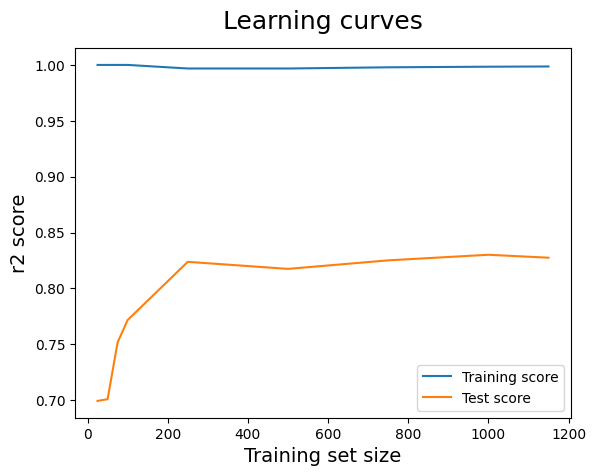

In [26]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=RandomForestClassifier(), X=X_rf, y=y_rf, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

## CatBoost classifier

In [27]:
from catboost import CatBoostClassifier

# Copy data
data_cat = data.copy()

# Encode target
y_cat = data_cat['rating']

# Create feature set
X_cat = data_cat.drop(columns=['rating'])

# Initialize CatBoostClassifier
cat = CatBoostClassifier()

# Ready X's and y's
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.3)

# Fit the model
cat.fit(X_train_cat, y_train_cat)


Learning rate set to 0.015637
0:	learn: 0.6846108	total: 3.96ms	remaining: 3.96s
1:	learn: 0.6762850	total: 7.44ms	remaining: 3.71s
2:	learn: 0.6681668	total: 11.3ms	remaining: 3.75s
3:	learn: 0.6604833	total: 14.9ms	remaining: 3.7s
4:	learn: 0.6529481	total: 18.7ms	remaining: 3.72s
5:	learn: 0.6457516	total: 22.6ms	remaining: 3.75s
6:	learn: 0.6388537	total: 26.5ms	remaining: 3.76s
7:	learn: 0.6320353	total: 30ms	remaining: 3.71s
8:	learn: 0.6255203	total: 33.3ms	remaining: 3.66s
9:	learn: 0.6192357	total: 36.5ms	remaining: 3.61s
10:	learn: 0.6131150	total: 39.9ms	remaining: 3.58s
11:	learn: 0.6070882	total: 43.4ms	remaining: 3.58s
12:	learn: 0.6015488	total: 45.5ms	remaining: 3.46s
13:	learn: 0.5959377	total: 49ms	remaining: 3.45s
14:	learn: 0.5906578	total: 52.5ms	remaining: 3.45s
15:	learn: 0.5856262	total: 55.9ms	remaining: 3.44s
16:	learn: 0.5807671	total: 58.6ms	remaining: 3.39s
17:	learn: 0.5760542	total: 61.9ms	remaining: 3.38s
18:	learn: 0.5715393	total: 65.2ms	remaining: 3.3

164:	learn: 0.4148664	total: 587ms	remaining: 2.97s
165:	learn: 0.4147148	total: 591ms	remaining: 2.97s
166:	learn: 0.4144530	total: 595ms	remaining: 2.96s
167:	learn: 0.4142218	total: 599ms	remaining: 2.96s
168:	learn: 0.4139460	total: 603ms	remaining: 2.97s
169:	learn: 0.4138355	total: 607ms	remaining: 2.96s
170:	learn: 0.4133898	total: 611ms	remaining: 2.96s
171:	learn: 0.4131936	total: 614ms	remaining: 2.96s
172:	learn: 0.4129583	total: 618ms	remaining: 2.95s
173:	learn: 0.4127082	total: 621ms	remaining: 2.95s
174:	learn: 0.4125549	total: 625ms	remaining: 2.94s
175:	learn: 0.4121212	total: 629ms	remaining: 2.94s
176:	learn: 0.4120012	total: 632ms	remaining: 2.94s
177:	learn: 0.4117921	total: 636ms	remaining: 2.94s
178:	learn: 0.4115460	total: 639ms	remaining: 2.93s
179:	learn: 0.4113328	total: 643ms	remaining: 2.93s
180:	learn: 0.4111349	total: 646ms	remaining: 2.92s
181:	learn: 0.4109711	total: 650ms	remaining: 2.92s
182:	learn: 0.4107137	total: 653ms	remaining: 2.91s
183:	learn: 

336:	learn: 0.3854459	total: 1.18s	remaining: 2.32s
337:	learn: 0.3852478	total: 1.18s	remaining: 2.32s
338:	learn: 0.3851087	total: 1.19s	remaining: 2.32s
339:	learn: 0.3850400	total: 1.19s	remaining: 2.31s
340:	learn: 0.3849047	total: 1.2s	remaining: 2.31s
341:	learn: 0.3848448	total: 1.2s	remaining: 2.31s
342:	learn: 0.3845997	total: 1.2s	remaining: 2.31s
343:	learn: 0.3844998	total: 1.21s	remaining: 2.3s
344:	learn: 0.3844291	total: 1.21s	remaining: 2.3s
345:	learn: 0.3843202	total: 1.21s	remaining: 2.29s
346:	learn: 0.3842012	total: 1.22s	remaining: 2.29s
347:	learn: 0.3840542	total: 1.22s	remaining: 2.29s
348:	learn: 0.3839657	total: 1.22s	remaining: 2.28s
349:	learn: 0.3838912	total: 1.23s	remaining: 2.28s
350:	learn: 0.3838686	total: 1.23s	remaining: 2.28s
351:	learn: 0.3837372	total: 1.23s	remaining: 2.27s
352:	learn: 0.3835372	total: 1.24s	remaining: 2.27s
353:	learn: 0.3834297	total: 1.24s	remaining: 2.27s
354:	learn: 0.3833527	total: 1.24s	remaining: 2.26s
355:	learn: 0.383

507:	learn: 0.3639504	total: 1.77s	remaining: 1.72s
508:	learn: 0.3638637	total: 1.77s	remaining: 1.71s
509:	learn: 0.3638180	total: 1.78s	remaining: 1.71s
510:	learn: 0.3636456	total: 1.78s	remaining: 1.71s
511:	learn: 0.3635920	total: 1.79s	remaining: 1.7s
512:	learn: 0.3634708	total: 1.79s	remaining: 1.7s
513:	learn: 0.3634259	total: 1.79s	remaining: 1.7s
514:	learn: 0.3633791	total: 1.8s	remaining: 1.69s
515:	learn: 0.3632423	total: 1.8s	remaining: 1.69s
516:	learn: 0.3631792	total: 1.8s	remaining: 1.69s
517:	learn: 0.3631301	total: 1.81s	remaining: 1.68s
518:	learn: 0.3629473	total: 1.81s	remaining: 1.68s
519:	learn: 0.3627774	total: 1.81s	remaining: 1.68s
520:	learn: 0.3627108	total: 1.82s	remaining: 1.67s
521:	learn: 0.3626617	total: 1.82s	remaining: 1.67s
522:	learn: 0.3625783	total: 1.82s	remaining: 1.67s
523:	learn: 0.3625345	total: 1.83s	remaining: 1.66s
524:	learn: 0.3623217	total: 1.83s	remaining: 1.66s
525:	learn: 0.3622010	total: 1.84s	remaining: 1.65s
526:	learn: 0.3620

678:	learn: 0.3433747	total: 2.36s	remaining: 1.11s
679:	learn: 0.3431932	total: 2.36s	remaining: 1.11s
680:	learn: 0.3429879	total: 2.37s	remaining: 1.11s
681:	learn: 0.3429400	total: 2.37s	remaining: 1.1s
682:	learn: 0.3427571	total: 2.38s	remaining: 1.1s
683:	learn: 0.3425927	total: 2.38s	remaining: 1.1s
684:	learn: 0.3425523	total: 2.38s	remaining: 1.1s
685:	learn: 0.3422938	total: 2.39s	remaining: 1.09s
686:	learn: 0.3420744	total: 2.39s	remaining: 1.09s
687:	learn: 0.3420205	total: 2.4s	remaining: 1.09s
688:	learn: 0.3419727	total: 2.4s	remaining: 1.08s
689:	learn: 0.3417184	total: 2.4s	remaining: 1.08s
690:	learn: 0.3416781	total: 2.4s	remaining: 1.07s
691:	learn: 0.3414667	total: 2.41s	remaining: 1.07s
692:	learn: 0.3414018	total: 2.41s	remaining: 1.07s
693:	learn: 0.3413654	total: 2.42s	remaining: 1.06s
694:	learn: 0.3413264	total: 2.42s	remaining: 1.06s
695:	learn: 0.3412758	total: 2.42s	remaining: 1.06s
696:	learn: 0.3411253	total: 2.42s	remaining: 1.05s
697:	learn: 0.341063

850:	learn: 0.3224991	total: 2.95s	remaining: 517ms
851:	learn: 0.3222558	total: 2.96s	remaining: 513ms
852:	learn: 0.3222170	total: 2.96s	remaining: 510ms
853:	learn: 0.3220934	total: 2.96s	remaining: 507ms
854:	learn: 0.3219708	total: 2.97s	remaining: 503ms
855:	learn: 0.3218577	total: 2.97s	remaining: 500ms
856:	learn: 0.3217994	total: 2.97s	remaining: 496ms
857:	learn: 0.3216695	total: 2.98s	remaining: 493ms
858:	learn: 0.3216338	total: 2.98s	remaining: 489ms
859:	learn: 0.3215977	total: 2.98s	remaining: 486ms
860:	learn: 0.3215616	total: 2.99s	remaining: 482ms
861:	learn: 0.3215290	total: 2.99s	remaining: 479ms
862:	learn: 0.3213550	total: 3s	remaining: 476ms
863:	learn: 0.3211742	total: 3s	remaining: 472ms
864:	learn: 0.3211428	total: 3s	remaining: 469ms
865:	learn: 0.3208782	total: 3s	remaining: 465ms
866:	learn: 0.3208269	total: 3.01s	remaining: 462ms
867:	learn: 0.3207884	total: 3.01s	remaining: 458ms
868:	learn: 0.3207421	total: 3.02s	remaining: 455ms
869:	learn: 0.3207039	to

In [28]:
# Predict
y_pred_cat = cat.predict(X_test_cat)
y_pred_cat

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_cat, y_pred_cat))

ACCURACY OF THE MODEL:  0.8219298245614035


In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_rf, y_train_rf)
clf.score(X_test_rf,y_test_rf)


0.8298245614035088

In [31]:
for index, feat in enumerate(clf.coef_[0]):
    if feat > 1:
        print(index) 

519
608
612
808
888
919
1233
1728


In [32]:
X_train_rf.columns[1415]

'Red apple_middle'

# Models fine-tuned

## Random Forest fine-tuned

In [33]:
from sklearn.preprocessing import LabelEncoder
data_rf_tuned = data.copy()

# Prepare X and y
y_rfc_tuned = data_rf_tuned["rating"]
X_rfc_tuned = data_rf_tuned.drop(columns=["rating"])

# Random Forest Classifier
rfc_tuned = RandomForestClassifier(n_estimators = 130,
                                 criterion='gini',
                                 random_state=2,
                                 n_jobs=3,)
                                  #splitter= 'best',
                                  #base_estimator=DecisionTreeClassifier())

# Ready X’s and y’s
X_train_rfc_tuned, X_test_rfc_tuned, y_train_rfc_tuned, y_test_rfc_tuned = train_test_split(X_rfc_tuned, y_rfc_tuned, test_size=0.2)

# Fit the model
rfc_tuned.fit(X_train_rfc_tuned, y_train_rfc_tuned)


#{'criterion': 'gini',
 #'max_features': 1,
 #'max_leaf_nodes': 5,
 #'min_impurity_decrease': 1,
 #'min_samples_leaf': 2,
 #'min_samples_split': 2,
 #'min_weight_fraction_leaf': 0,
 #'random_state': 1,
 #'splitter': 'best'}

RandomForestClassifier(n_estimators=130, n_jobs=3, random_state=2)

In [34]:
rfc_tuned.predict(X_test_rfc_tuned)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
X_test_rfc_tuned.loc[252]

Absinthe_top         0.0
Absolute_base        0.0
Absolute_middle      0.0
Absolute_top         0.0
Accord_base          0.0
                    ... 
Ylangtincture_top    0.0
Yuzu_middle          0.0
Yuzu_top             0.0
Zefir_top            0.0
Zest_top             0.0
Name: 252, Length: 1935, dtype: float64

In [36]:
y_pred_rfc_tuned = rfc_tuned.predict(X_test_rfc_tuned)
y_pred_rfc_tuned

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_rfc_tuned, y_pred_rfc_tuned))

ACCURACY OF THE MODEL:  0.8394736842105263


In [38]:
import pickle

filename = open('test_model.pkl', 'wb')
pickle.dump(rfc_tuned, filename)
filename.close()

In [39]:
import joblib

joblib.dump(rfc_tuned, 'new_model.joblib')


['new_model.joblib']

In [41]:
#import os  
#os.makedirs('/Users/philine/code/thibaultdiers/project_fragrance/website_perfume', exist_ok=True)  
#X_new.to_csv('/Users/philine/code/thibaultdiers/project_fragrance/website_perfume/X_new_3.csv',index=False)

In [42]:
X_t = pd.read_csv('X_test.csv')
X_t.iloc[0]

Absinthe_top         0.0
Absolute_base        0.0
Absolute_middle      0.0
Absolute_top         0.0
Accord_base          0.0
                    ... 
Ylangtincture_top    0.0
Yuzu_middle          0.0
Yuzu_top             0.0
Zefir_top            0.0
Zest_top             0.0
Name: 0, Length: 1935, dtype: float64

In [43]:
y_test_rfc_tuned

1920    0
2275    0
911     0
1668    0
271     0
       ..
3671    0
2959    1
1894    0
236     0
3768    0
Name: rating, Length: 760, dtype: int64

In [44]:
X_test_rfc_tuned

,Absinthe_top,Absolute_base,Absolute_middle,Absolute_top,Accord_base,Accord_middle,Accord_top,Acetate_top,Acácia_base,Acácia_middle,...,Ylang_middle,Ylang_top,Ylangelemi_middle,Ylangiris_middle,Ylangiris_top,Ylangtincture_top,Yuzu_middle,Yuzu_top,Zefir_top,Zest_top
1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
input_top = pd.DataFrame(0, index=np.arange(1), columns=list(data))
input_top.drop(columns = "rating", inplace = True)

In [46]:
X_new = pd.DataFrame(X_test_rfc_tuned.loc[3650]).T
X_new

,Absinthe_top,Absolute_base,Absolute_middle,Absolute_top,Accord_base,Accord_middle,Accord_top,Acetate_top,Acácia_base,Acácia_middle,...,Ylang_middle,Ylang_top,Ylangelemi_middle,Ylangiris_middle,Ylangiris_top,Ylangtincture_top,Yuzu_middle,Yuzu_top,Zefir_top,Zest_top
3650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
rfc_tuned.predict(X_new)

array([0])

In [48]:
model_tt = joblib.load('new_model.joblib')
model_tt.predict(X_new)

array([0])

In [51]:
#X_new_3 = pd.read_csv('X_new_2.csv')
#X_new_2

In [52]:
#X_new_2.shape

In [53]:
#X_new_2.T